#**Titanic Survival Prediction**

#Importing Required Libraries

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer

#Loading Dataset

In [12]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Preprocessing

**Checking for missing values** **bold text**

In [13]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


**Handling missing values**

In [14]:
# Filling Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Filling Embarked with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Dropping Cabin (too many missing values)
df.drop(columns=['Cabin'], inplace=True)
imputer = SimpleImputer(strategy='mean')

<ipython-input-14-a5ea534385b3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-14-a5ea534385b3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

**Drop unnecessary columns**

In [15]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)


**Encoding categorical variables**

In [16]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])         # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])  # S=2, C=0, Q=1


# Feature Selection & Splitting

In [17]:

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fitting the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Model Training

**Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



**Random Forest**

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf)*100)
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# Result Comparsion

**Accuracy Comparison Bar Plot**

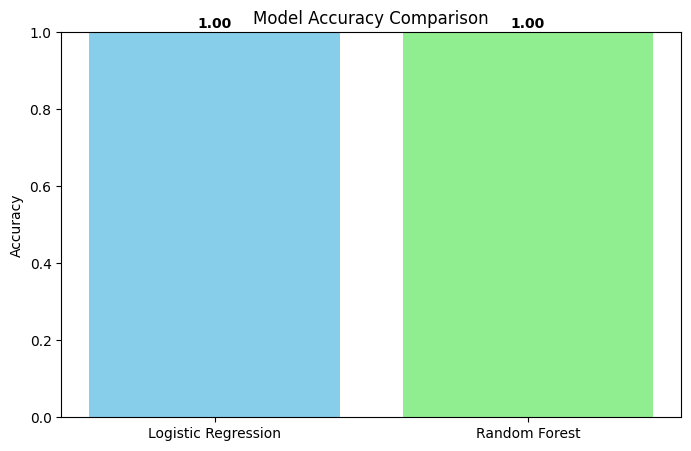

In [20]:


# Calculating accuracy scores
from sklearn.metrics import accuracy_score

acc_lr = accuracy_score(y_test, y_pred)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Bar plot
models = ['Logistic Regression', 'Random Forest']
accuracies = [acc_lr, acc_rf]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


**Confusion Matrix Comparison**

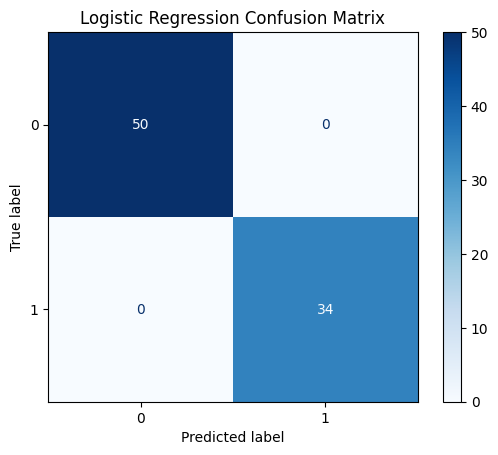

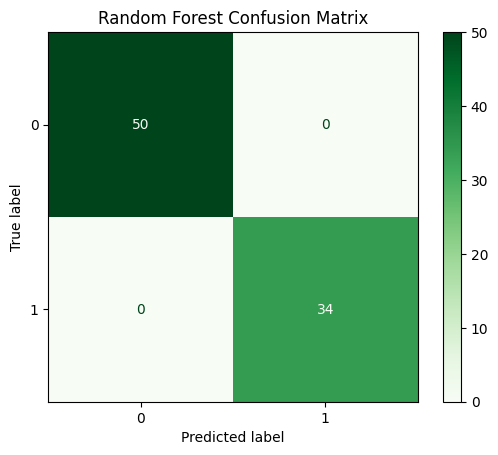

In [21]:

# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()


**ROC Curve Comparison**

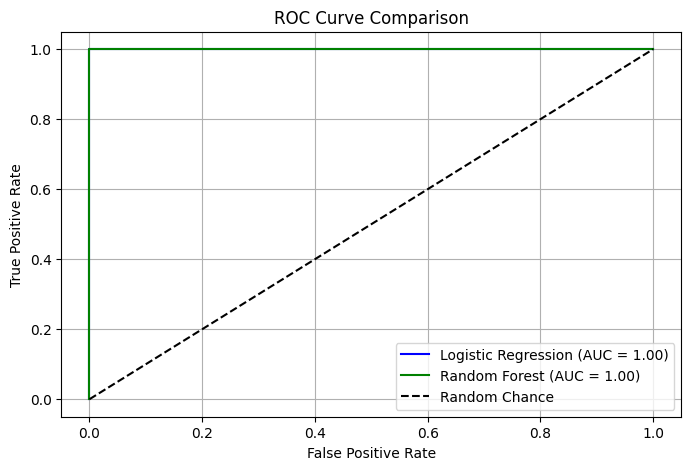

In [22]:
from sklearn.metrics import roc_curve, auc

# Probabilities for ROC
lr_probs = lr.predict_proba(X_test)[:,1]
rf_probs = rf.predict_proba(X_test)[:,1]

# ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

# Plotting
plt.figure(figsize=(8,5))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')
plt.plot([0,1], [0,1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()


**Performing Cross Validation**

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')

# Random Forest
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print("Logistic Regression Cross-Validation Scores:", logreg_scores)
print("Random Forest Cross-Validation Scores:", rf_scores)

print("Logistic Regression Mean Accuracy:", logreg_scores.mean())
print("Random Forest Mean Accuracy:", rf_scores.mean())


Logistic Regression Cross-Validation Scores: [1. 1. 1. 1. 1.]
Random Forest Cross-Validation Scores: [1. 1. 1. 1. 1.]
Logistic Regression Mean Accuracy: 1.0
Random Forest Mean Accuracy: 1.0


**Conclusion**

Both Logistic Regression and Random Forest models performed excellently on the Titanic Survival Prediction task, achieving high accuracy during cross-validation. This suggests that both models are capable of capturing the underlying patterns in the data effectively. However, the choice between these models depends on other factors such as interpretability, complexity, and performance on unseen test data.

**Logistic Regression**: It is simpler, more interpretable, and faster for smaller datasets or real-time predictions. However, it might not capture complex relationships as well as more sophisticated models like Random Forest.

**Random Forest**: Being an ensemble method, it tends to perform better when the data has complex, nonlinear relationships. It can handle missing values and feature interactions better, but it is less interpretable than Logistic Regression and may take more time to train.